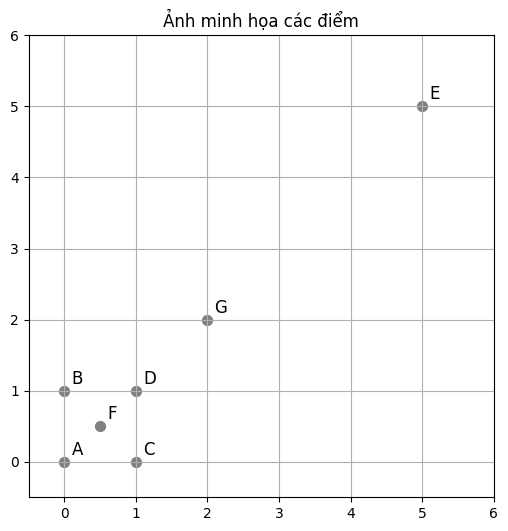

In [31]:
import matplotlib.pyplot as plt

points = {
    'A': (0, 0),
    'B': (0, 1),
    'C': (1, 0),
    'D': (1, 1),
    'F': (0.5, 0.5),
    'G': (2, 2),
    'E': (5, 5)
}

plt.figure(figsize=(6, 6))

# Vẽ các điểm màu xám
for label, (x, y) in points.items():
    plt.scatter(x, y, c='gray', s=50)
    # Ghi nhãn
    plt.text(x+0.1, y+0.1, label, fontsize=12)

# Giới hạn và lưới
plt.xticks(range(0, 7))
plt.yticks(range(0, 7))
plt.xlim(-0.5, 6)
plt.ylim(-0.5, 6)
plt.grid(True)

plt.title("Ảnh minh họa các điểm")
plt.show()


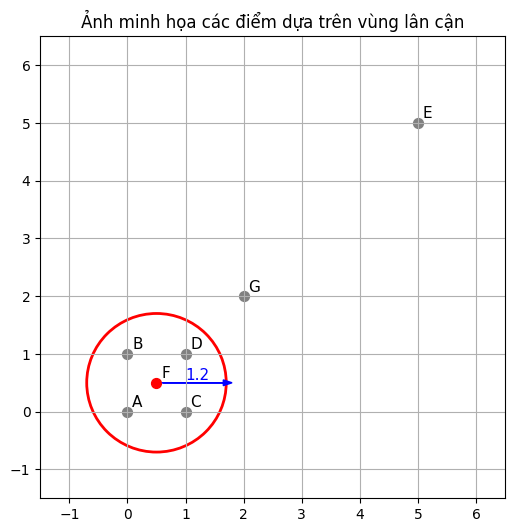

In [48]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

# 7 điểm với kết quả phân loại:
# F = core; A, B, C, D = border; G, E = noise
points = {
    'A': (0, 0),
    'B': (0, 1),
    'C': (1, 0),
    'D': (1, 1),
    'F': (0.5, 0.5),  # core
    'G': (2, 2),      # noise
    'E': (5, 5)       # noise
}
point_types = {
    'A': 'border',
    'B': 'border',
    'C': 'border',
    'D': 'border',
    'F': 'core',
    'G': 'border',
    'E': 'border'
}

# Hàm vẽ mũi tên biểu diễn bán kính từ (start) đến (end)
def draw_radius_arrow(start, end, label_text, color='blue'):
    dx = end[0] - start[0]
    dy = end[1] - start[1]
    plt.arrow(start[0], start[1], dx, dy,
              length_includes_head=True,
              head_width=0.1, head_length=0.15,
              fc=color, ec=color)
    mx = (start[0] + end[0]) / 2
    my = (start[1] + end[1] + 0.5) / 2
    plt.text(mx, my - 0.2, label_text, color=color, fontsize=11, ha='center')

plt.figure(figsize=(6,6))

# Vẽ các điểm với màu tương ứng
for label, (x, y) in points.items():
    ptype = point_types[label]
    if ptype == 'core':
        plt.scatter(x, y, c='red', s=50, label='Core' if 'Core' not in plt.gca().get_legend_handles_labels()[1] else "")
    elif ptype == 'border':
        plt.scatter(x, y, c='gray', s=50, label='Border' if 'Border' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(x, y, c='blue', marker='x', s=50, label='Noise' if 'Noise' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(x+0.08, y+0.08, label, fontsize=11)

# Vẽ vòng tròn solid (đường liền) bán kính eps = 1.2 cho F (core)
eps = 1.2
fx, fy = points['F']
circle_F = Circle((fx, fy), eps, color='red', fill=False, linestyle='-', linewidth=2)
plt.gca().add_patch(circle_F)

# Để tránh mũi tên chồng lên điểm F, ta dịch chuyển điểm bắt đầu mũi tên một chút
offset = 0.1
start_arrow = (fx + offset, fy)
end_arrow = (fx + offset + eps, fy)  # Hướng nằm ngang sang bên phải
draw_radius_arrow(start_arrow, end_arrow, f"{eps}", color='blue')

plt.xticks(range(-1,7))
plt.yticks(range(-1,7))
plt.xlim(-1.5, 6.5)
plt.ylim(-1.5, 6.5)
plt.grid(True)
# plt.legend()
plt.title("Ảnh minh họa các điểm dựa trên vùng lân cận")
plt.show()

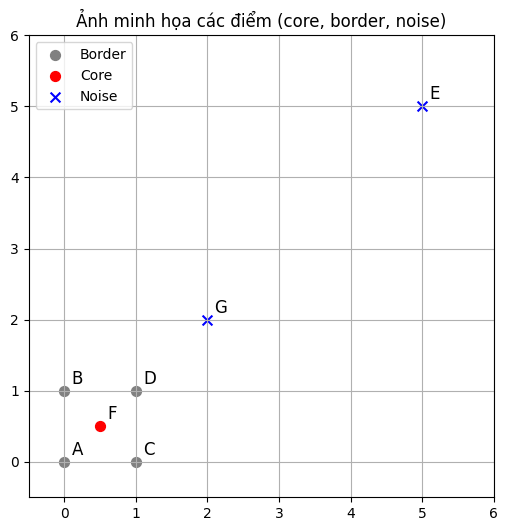

In [49]:
import matplotlib.pyplot as plt

point_types = {
    'A': 'border',
    'B': 'border',
    'C': 'border',
    'D': 'border',
    'F': 'core',
    'G': 'noise',
    'E': 'noise'
}

plt.figure(figsize=(6,6))

for label, (x, y) in points.items():
    ptype = point_types[label]
    if ptype == 'core':
        plt.scatter(x, y, c='red', s=50, label='Core' if 'Core' not in plt.gca().get_legend_handles_labels()[1] else "")
    elif ptype == 'border':
        plt.scatter(x, y, c='gray', s=50, label='Border' if 'Border' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:  # noise
        plt.scatter(x, y, c='blue', marker='x', s=50, label='Noise' if 'Noise' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(x+0.1, y+0.1, label, fontsize=12)

plt.xticks(range(0,7))
plt.yticks(range(0,7))
plt.xlim(-0.5, 6)
plt.ylim(-0.5, 6)
plt.grid(True)
plt.legend()
plt.title("Ảnh minh họa các điểm (core, border, noise)")
plt.show()